In [2]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
trainset = CIFAR10("./dataset", train=True, download=True, transform=transform)
trainset[0]

Files already downloaded and verified


(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [6]:
import os
len([name for name in os.listdir('./data/images-fd/')])

16422

In [17]:
os.path.splitext('12jasflflasdjf')
from pathlib import Path

Path('/home/hung/PythonProject/federated-learning/data/images/cb399ec010d1031fbaa1dad093a3a328').exists

image_dir = Path('./data/images/')
downloaded = [os.path.splitext(x)[0] for x in os.listdir(image_dir) if os.path.splitext(x)[1] == '.jpg']
# downloaded = [os.path.splitext(x)[0] for x in os.listdir(image_dir)]
len(downloaded)

16421

In [1]:
import torch
from dataloader import load_fitzpatrick
from model import VGG16, Net

trainloaders,valoaders,testloader = load_fitzpatrick(10, './data/images/', skin_seperate=False, batch_size=32)

train set loaded, length:  14777
test set loaded, length:  1646


In [3]:
focus_class = 2

images, labels= next(iter( testloader))
outputs = VGG16(3)(images)

torch.max(outputs.data, 1)[1]

# focus_label = 2
# torch.logical_and(torch.max(outputs.data, 1)[1] == labels , labels == focus_label).sum().item()


torch.Size([32, 512, 2, 2])
torch.Size([32, 2048])


tensor([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2])

In [1]:
from config import CLASSES
import numpy as np
import random

confusion_matrix = np.zeros((len(CLASSES), len(CLASSES)))
i = 0
for p in range(len(CLASSES)):
    if p == 0: continue
    for t in range(len(CLASSES)):
        confusion_matrix[p][t] += i
        i+=1

confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1)[:, None]
confusion_matrix

/tmp/ipykernel_19593/28344914.py:13: RuntimeWarning: invalid value encountered in divide
  confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1)[:, None]


array([[       nan,        nan,        nan],
       [0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667]])

In [8]:
np.isnan(confusion_matrix[0][0])

True

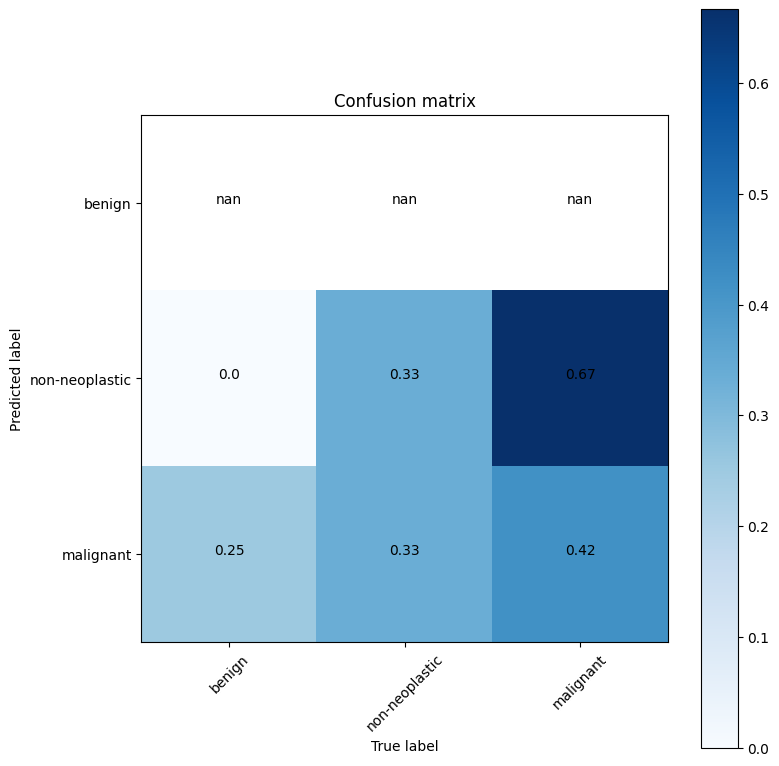

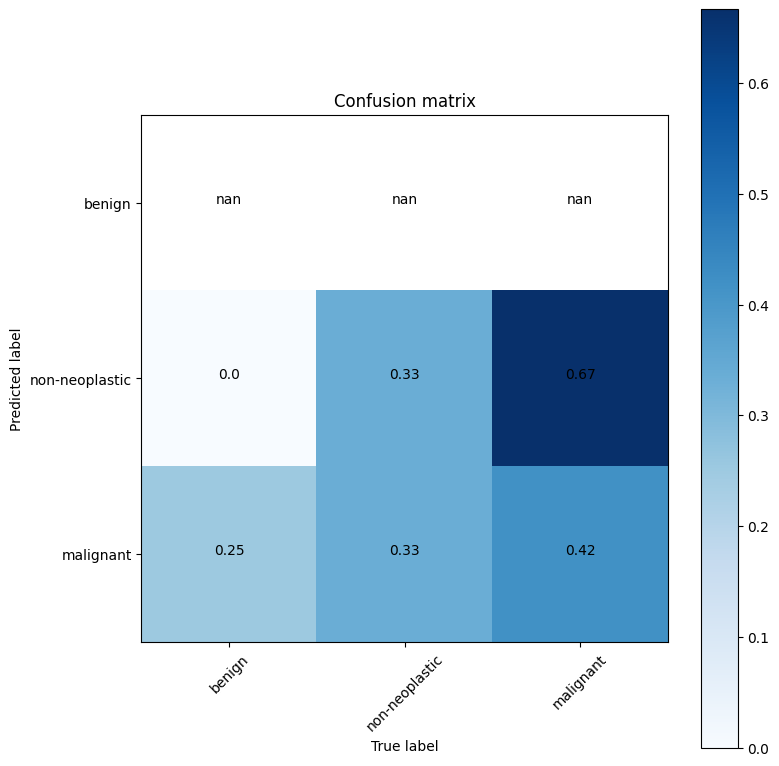

In [3]:
from utils import plot_confusion_matrix
plot_confusion_matrix(confusion_matrix, CLASSES)